In [0]:
%pylab inline
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim

from torch.utils.data import TensorDataset
from torch.autograd import Variable
from torchvision import transforms
from torchvision.datasets import MNIST
import os

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

Populating the interactive namespace from numpy and matplotlib


In [0]:
# ls('./data')

# import os
# os.getcwd()

# pwd

!ls ./data/MNIST/raw/train-images-idx3-ubyte

./data/MNIST/raw/train-images-idx3-ubyte


In [0]:
train = MNIST('./data', train=True, download=True, transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

test = MNIST('./data', train=False, download=True, transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

# Create DataLoader
dataloader_args = dict(shuffle=True, batch_size=256,num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)
train_loader = dataloader.DataLoader(train, **dataloader_args)
test_loader = dataloader.DataLoader(test, **dataloader_args)

In [0]:
# dataloader_args


In [0]:
# One hidden Layer NN
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc = nn.Linear(784, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        x = x.view((-1, 784))
        h = F.relu(self.fc(x))
        h = self.fc2(h)
        return F.softmax(h)    
    
    
model = Model()
if cuda:
    model.cuda() # CUDA!
optimizer = optim.Adam(model.parameters(), lr=1e-3)

**Begining of the signal in NOISE analysis**

In [0]:
%pylab inline
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim

from torch.utils.data import TensorDataset
from torch.autograd import Variable
from torchvision import transforms
from torchvision.datasets import MNIST
import os

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# One hidden Layer NN
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc = nn.Linear(784, 1000)
        self.fc2 = nn.Linear(1000, 1)

    def forward(self, x):
        x = x.view((-1, 784))
        h = F.relu(self.fc(x))
        h = F.sigmoid(self.fc2(h))
        return h
#         return F.softmax(h)    
      
    
    
model = Model()
if cuda:
    model.cuda() # CUDA!
optimizer = optim.Adam(model.parameters(), lr=1e-3)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['mat', 'test', 'f', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
# One hidden Layer NN
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc = nn.Linear(784, 1000)
        self.fc2 = nn.Linear(1000, 2)

    def forward(self, x):
        x = x.view((-1, 784))
        h = F.relu(self.fc(x))
        h = self.fc2(h)
        return F.softmax(h, dim=1)    
    
    
model = Model()
if cuda:
    model.cuda() # CUDA!
optimizer = optim.Adam(model.parameters(), lr=1e-3)





#  CNN
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5, 1)
        self.conv2 = nn.Conv2d(10, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 100)
        self.fc2 = nn.Linear(100, 1)

    def forward(self, x):
        x_1 = F.relu(self.conv1(x))
        x = F.max_pool2d(x_1, 2, 2)
        x_2 = F.relu(self.conv2(x))
        x = F.max_pool2d(x_2, 2, 2)
        x = x.view(-1, 4*4*50)
        x_3 = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return F.softmax(x, dim=1)
        h = F.sigmoid(self.fc2(x_3))
        return h, x_3, x_2, x_1

    
model = Model()
if cuda:
    model.cuda() # CUDA!
optimizer = optim.Adam(model.parameters(), lr=1e-3) 
    


In [0]:
# # A binary classifier

# from torchvision import datasets, transforms

# def mnist_data():
#     compose = transforms.Compose(
#         [
#          transforms.ToTensor(),
#          transforms.Normalize((.5), (.5))         
# #          transforms.Normalize((.5, .5, .5), (.5, .5, .5))
#         ])
# #     transform = transforms.Compose([transforms.Resize(64),   # scale!!!!!
# #         transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])    

#     transform = transforms.Compose([
#         transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])    

    
#     out_dir = './dataset'
#     return datasets.MNIST(root=out_dir, train=True, transform=transform, download=True)



train = MNIST('./data', train=True, download=True
    , transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

test = MNIST('./data', train=False, download=True , transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )
  


In [0]:
# Load data

digit_p, digit_q =  2, 8



data1 = train
# selecting number 0 zero only
tt = data1.targets[(data1.targets== digit_p) | (data1.targets== digit_q)]
tt[tt==digit_p] =  0
tt[tt==digit_q] = 1
dd = data1.data[(data1.targets== digit_p) | (data1.targets== digit_q)] 
# tt = data.targets[(data.targets== 1)]
# dd = data.data[(data.targets== 1)] 

data1.targets = tt
data1.data = dd
train_loader = torch.utils.data.DataLoader(data1, batch_size=100, shuffle=True, drop_last = True)
# Num batches
# num_batches = len(train_loader)

print((tt==0).sum(), (tt==1).sum())





data2 = test
# selecting number 0 zero only
tt = data2.targets[(data2.targets== digit_p) | (data2.targets== digit_q)]
tt[tt==digit_p] =  0
tt[tt==digit_q] = 1
dd = data2.data[(data2.targets== digit_p) | (data2.targets== digit_q)] 
# tt = data.targets[(data.targets== 1)]
# dd = data.data[(data.targets== 1)] 

data2.targets = tt
data2.data = dd
test_loader = torch.utils.data.DataLoader(data2, batch_size=100, shuffle=True, drop_last = True)
# Num batches
# num_batches = len(train_loader)
print((tt==0).sum(), (tt==1).sum())

tensor(5958) tensor(5851)
tensor(1032) tensor(974)


In [0]:
# a = (data.targets== 1) | (data.targets== 2)
# num_batches
# target.cuda()
# (test.targets==-1).sum()
# (data.targets==5).sum()
# len(tt)
# (tt==0).sum()


from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# data.targets[100]
a = torch.ByteTensor([0,1,1,0])
b = torch.ByteTensor([0,1,0,1])

In [0]:
a.dtype
a | b
(data.targets==1) 

AttributeError: ignored

In [0]:
# data.data.shape


def one_hot(target):
#   one hot encoding
  batch_size = target.size(0)
  nb_digits = 2
  # Dummy input that HAS to be 2D for the scatter (you can use view(-1,1) if needed)
  # y = torch.LongTensor(target.size(0),1).random_() % nb_digits
  # One hot encoding buffer that you create out of the loop and just keep reusing
  y_onehot = torch.FloatTensor(batch_size, nb_digits)

  # In your for loop
  y_onehot.zero_()
  y_onehot.scatter_(1, target[:,None].type(torch.LongTensor), 1)
  target = y_onehot
  
  return target




In [0]:
# GPU compatible
EPOCHS = 15
losses = []
BCE_loss = nn.BCELoss()

model.train()
for epoch in range(EPOCHS):
    for batch_idx, (data_b, target) in enumerate(train_loader):
        # Get Samples
#         import pdb; pdb.set_trace()
        data_b, target = Variable(data_b/256), Variable(target)
        
        if cuda:
            data_b, target = data_b.cuda(), target.cuda()
        
        # Init
        optimizer.zero_grad()

        # Predict
#         import pdb; pdb.set_trace()
        y_pred, _, _, _ = model(data_b) #[0].squeeze(1) #.cuda()
        y_pred = y_pred.squeeze(1)
  
        # Calculate loss
        target = target.type(torch.FloatTensor)#.cuda()
        y_pred = y_pred.type(torch.FloatTensor)#.cuda()

#         loss = F.cross_entropy(y_pred, target)
        
#         target = one_hot(target)


#         import pdb; pdb.set_trace()
        loss = BCE_loss(y_pred, target)
        
        losses.append(loss.cpu().data)
#         losses.append(loss.cpu().data[0])        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        
        # Display
        if batch_idx % 100 == 1:
            print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch+1,
                EPOCHS,
                batch_idx * len(data_b), 
                len(train_loader.dataset),
                100. * batch_idx / len(train_loader), 
                loss.cpu().data), 
                end='')
    # Eval
#     evaluate_x = Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
#     evaluate_y = Variable(test_loader.dataset.test_labels)
    evaluate_x = test.data.type(torch.FloatTensor)/256 # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
    evaluate_y = test.targets #Variable(test_loader.dataset.test_labels)    
    
#     evaluate_y = one_hot(evaluate_y)
    
    
    if cuda:
        evaluate_x, evaluate_y = evaluate_x.cuda(), evaluate_y.cuda()

    model.eval()
    output, _, _, _ = model(evaluate_x[:,None,...])
#     pred = output.data.max(1)[1]
    pred = output.type(torch.ByteTensor).squeeze()
    evaluate_y = evaluate_y.type(torch.ByteTensor)

#     import pdb; pdb.set_trace()
    d = pred.eq(evaluate_y.data).cpu()

#     vals, idxs = pred.max(dim=1)
#     vals2, idxs2 = evaluate_y.data.max(dim=1)
#     d = idxs.eq(idxs2).cpu()
    accuracy = d.sum().type(dtype=torch.float64)/d.size()[0]
    
    print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Test Accuracy: {:.4f}%'.format(
        epoch+1,
        EPOCHS,
        len(train_loader.dataset), 
        len(train_loader.dataset),
        100. * batch_idx / len(train_loader), 
        loss.cpu().data,
        accuracy*100,
        end=''))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


 Train Epoch: 1/15 [11809/11809 (99%)]	Loss: 0.692929	 Test Accuracy: 51.4457%
 Train Epoch: 2/15 [11809/11809 (99%)]	Loss: 0.270294	 Test Accuracy: 85.2941%
 Train Epoch: 3/15 [11809/11809 (99%)]	Loss: 0.178050	 Test Accuracy: 90.8774%
 Train Epoch: 4/15 [11809/11809 (99%)]	Loss: 0.132564	 Test Accuracy: 91.4257%
 Train Epoch: 5/15 [11809/11809 (99%)]	Loss: 0.065449	 Test Accuracy: 92.7218%
 Train Epoch: 6/15 [11809/11809 (99%)]	Loss: 0.059908	 Test Accuracy: 92.6221%
 Train Epoch: 7/15 [11809/11809 (99%)]	Loss: 0.045415	 Test Accuracy: 94.0678%
 Train Epoch: 8/15 [11809/11809 (99%)]	Loss: 0.047679	 Test Accuracy: 94.8654%
 Train Epoch: 9/15 [11809/11809 (99%)]	Loss: 0.026770	 Test Accuracy: 94.1675%
 Train Epoch: 10/15 [11809/11809 (99%)]	Loss: 0.016894	 Test Accuracy: 94.3669%
 Train Epoch: 11/15 [11809/11809 (99%)]	Loss: 0.029802	 Test Accuracy: 94.9651%
 Train Epoch: 12/15 [11809/11809 (99%)]	Loss: 0.025828	 Test Accuracy: 94.1675%
 Train Epoch: 13/15 [11809/11809 (99%)]	Loss: 0.1

In [0]:
# proportion of noise classified as 0 before and after modulation




In [0]:
y_onehot = torch.FloatTensor(3, 3)
y_onehot.zero_()
y_onehot.scatter_(

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [0]:
# this worked with TPU
EPOCHS = 30
losses = []
BCE_loss = nn.BCELoss()

model.train()
for epoch in range(EPOCHS):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Get Samples
#         import pdb; pdb.set_trace()
        data, target = Variable(data), Variable(target)
        
#         if cuda:
#             data, target = data.cuda(), target.cuda()
        
        # Init
        optimizer.zero_grad()

        # Predict
        y_pred = model(data).squeeze(1)

        # Calculate loss
        target = target.type(torch.FloatTensor)#.cuda()
        y_pred = y_pred.type(torch.FloatTensor)#.cuda()

#         loss = F.cross_entropy(y_pred, target)
        loss = BCE_loss(y_pred, target)
        
        losses.append(loss.cpu().data)
#         losses.append(loss.cpu().data[0])        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        
        # Display
        if batch_idx % 100 == 1:
            print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch+1,
                EPOCHS,
                batch_idx * len(data), 
                len(train_loader.dataset),
                100. * batch_idx / len(train_loader), 
                loss.cpu().data), 
                end='')
    # Eval
#     evaluate_x = Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
#     evaluate_y = Variable(test_loader.dataset.test_labels)
    evaluate_x = test.data.type(torch.FloatTensor) # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
    evaluate_y = test.targets #Variable(test_loader.dataset.test_labels)    
    if cuda:
        evaluate_x, evaluate_y = evaluate_x.cuda(), evaluate_y.cuda()

    model.eval()
    output = model(evaluate_x[:,None,...])
#     pred = output.data.max(1)[1]
    pred = output.type(torch.ByteTensor).squeeze()
    evaluate_y = evaluate_y.type(torch.ByteTensor)

    d = pred.eq(evaluate_y.data).cpu()
    accuracy = d.sum().type(dtype=torch.float64)/d.size()[0]
    
    print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Test Accuracy: {:.4f}%'.format(
        epoch+1,
        EPOCHS,
        len(train_loader.dataset), 
        len(train_loader.dataset),
        100. * batch_idx / len(train_loader), 
        loss.cpu().data,
        accuracy*100,
        end=''))
    

RuntimeError: ignored

In [0]:
evaluate_x = test.data.type(torch.FloatTensor).clone() # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
evaluate_y = test.targets.clone() #Variable(test_loader.dataset.test_labels)
if cuda:
    evaluate_x, evaluate_y = evaluate_x.cuda()/256, evaluate_y.cuda()

model.eval()
output = model(evaluate_x[:,None,...])[0]
# pred = output.data.max(1)[1]
pred = output.type(torch.ByteTensor).squeeze()
evaluate_y = evaluate_y.type(torch.ByteTensor)

d = pred.eq(evaluate_y.data).cpu()
accuracy = d.sum().type(dtype=torch.float64)/d.size()[0]

print('Accuracy:', accuracy*100)

Accuracy: tensor(91.3107, dtype=torch.float64)


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [0]:
evaluate_y.data.dtype
pred.dtype

torch.uint8

In [0]:
import sklearn
from sklearn import metrics
sklearn.metrics.confusion_matrix(pred.cpu().numpy(), evaluate_y.cpu().numpy())


array([[ 953,    4],
       [   5, 1005]])

In [0]:
evaluate_y
pred.max()
output.min()
output.shape
pred.shape

torch.Size([2163])

In [0]:
# data.cpu()
# y_pred.squeeze(1).shape
e = target.type(torch.BoolTensor)
# BCE_loss(e, e)
# y_pred.dtype
# target
y_pred.max()
# target.dtype

tensor(1.0000, grad_fn=<MaxBackward1>)

In [0]:
# target[44]
d, r = next(iter((train_loader)))
r

tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 1, 0, 1])

In [0]:
test_data = test.data.type(torch.FloatTensor) # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
test_data = test_data/256


In [0]:
(train.targets==2).sum()
# test_data.size(0)

tensor(0)

In [0]:
# embed the signal in noise

# - get a random test digit and add it to random noise
# - feed to the net and collect the answer
# - do record the averages


# model.cuda()
model.eval()
test_data = test.data.type(torch.FloatTensor) # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
test_data = test_data/256


#     output = model(evaluate_x[:,None,...])



batch_size = test_data.size(0)
all_size = batch_size * 1

stats = dict()
for i in range(2):
    stats[i] = 0

iters = 1    
    
avgs = torch.zeros(iters, 2, 28*28)


weight = 100

for kk in range(iters):
  print(kk)
  
#   z = torch.rand(all_size, 1, 28, 28)*2 -1 #.cuda()
  z = torch.rand(all_size, 28, 28) #.cuda()  
  z.cuda()
  #plt.imshow(z[1].reshape(28,28))


  all_preds = []
  all_idx = torch.ones(all_size, dtype = torch.uint8)
  for k in range(0, all_size, batch_size):
#       stimulus = z[k:k+batch_size] + test_data  # noise + stim
#       kk = (test_data[0] + 5*z[0])/5
      stimulus = (1*z[k:k+batch_size] + weight*test_data)/ (weight+1)  # noise + stim
        
      y_pred = model(test_data[:,None,...].cuda())[0]
      
      conf, pred = y_pred.data.max(1)
#       y_pred[y_pred < 0.5]= 0
#       y_pred[y_pred > 0.5]= 1      
      z[k:k+batch_size] = stimulus

#       import pdb; pdb.set_trace()
  
#       indices = torch.ones(y_pred.size(0), dtype = torch.uint8)
#       indices[torch.mean(y_pred, dim =1)==0] = 0 
#       import pdb; pdb.set_trace()
      all_idx[k:k+batch_size] = pred.squeeze() 
#       pred = y_pred[indices==1].data.max(1)[1]

      all_preds.append(pred)
#       all_preds.append(y_pred)

  pred = torch.cat(all_preds).squeeze()

  for i in range(2):
    stats[i] += torch.sum(all_idx==i)
  
#   z = z[all_idx]
  for i in range(2):
      a = torch.mean(z[pred==i], dim=0) 
      avgs[kk, i] = a.reshape(28*28)

print(stats)

0
{0: tensor(2163), 1: tensor(0)}


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
  
    title = ''
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
    else:
      pass
#         print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
#     ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=class_names,
#                       title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

# plt.show()

In [0]:
def sigmoid_array(x):                                        
    return 1 / (1 + np.exp(-x))
  
from scipy.special import softmax
m = softmax(aa_n.cpu().numpy())

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.06, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.06, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.05, 0.01, 0.01, 0.01,
       0.01, 0.06, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01], dtype=float32)

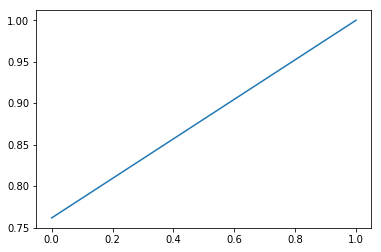

In [0]:
plt.plot(np.tanh(np.array([1,10])))
m

In [0]:
aa

tensor([6.8429e-07, 0.0000e+00, 1.3368e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.4649e-04, 0.0000e+00, 0.0000e+00, 4.0928e-04, 0.0000e+00, 1.9446e-01,
        1.0564e-01, 0.0000e+00, 0.0000e+00, 4.3479e-03, 0.0000e+00, 2.6541e-07,
        1.9206e-01, 0.0000e+00, 0.0000e+00, 8.4880e-05, 0.0000e+00, 0.0000e+00,
        2.5164e-06, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.9513e-08, 1.7293e-01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.9495e-03, 1.9325e-01, 3.9200e-04,
        5.5139e-05, 0.0000e+00, 0.0000e+00, 4.1652e-03, 2.2717e-05, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.4046e-04, 1.2343e-04, 0.0000e+00, 1.2262e-07,
        1.0489e-04, 0.0000e+00, 0.0000e+00, 2.7743e-05, 1.4917e-05, 3.0773e-05,
        0.0000e+00, 0.0000e+00, 3.4342e-06, 0.0000e+00, 2.9812e-05, 1.8961e-04,
        3.5271e-04, 5.5928e-03, 0.0000e+00, 5.0421e-02, 3.8714e-03, 0.0000e+00,
        1.0412e-02, 0.0000e+00, 0.0000e+00, 3.5095e-03, 0.0000e+00, 3.2355e-04,
        0.0000e+00, 0.0000e+00, 0.0000e+

In [0]:
# aa.cpu().numpy().shape
aa.min()
aa_n = (aa - aa.min()) / (aa.max() - aa.min())
# aa_n = 2*aa_n - 1
m = softmax(aa_n.cpu().numpy())
m

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.03, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01,
       0.01, 0.03, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01], dtype=float32)

In [0]:
# aa_n.max()
# aa_n = (aa - aa.min()) / (aa.max() - aa.min())
# aa_n =10*aa_n - 1
aa_n = sigmoid_array(aa.cpu().numpy())
m = softmax(aa.cpu().numpy())
m
# aa.max()

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01], dtype=float32)

In [0]:
sigmoid_array(np.tanh(aa_n.cpu().numpy())).max()
aa_n

tensor([ -99.9996, -100.0000,  -99.9313, -100.0000, -100.0000, -100.0000,
         -99.8218, -100.0000, -100.0000,  -99.7895, -100.0000,    0.0000,
         -45.6754, -100.0000, -100.0000,  -97.7642, -100.0000,  -99.9999,
          -1.2348, -100.0000, -100.0000,  -99.9564, -100.0000, -100.0000,
         -99.9987, -100.0000, -100.0000, -100.0000,  -99.9999,  -11.0712,
        -100.0000, -100.0000, -100.0000,  -96.9406,   -0.6243,  -99.7984,
         -99.9716, -100.0000, -100.0000,  -97.8581,  -99.9883, -100.0000,
        -100.0000, -100.0000,  -99.8764,  -99.9365, -100.0000,  -99.9999,
         -99.9461, -100.0000, -100.0000,  -99.9857,  -99.9923,  -99.9842,
        -100.0000, -100.0000,  -99.9982, -100.0000,  -99.9847,  -99.9025,
         -99.8186,  -97.1240, -100.0000,  -74.0718,  -98.0092, -100.0000,
         -94.6459, -100.0000, -100.0000,  -98.1953, -100.0000,  -99.8336,
        -100.0000, -100.0000, -100.0000, -100.0000,  -99.8400, -100.0000,
        -100.0000, -100.0000, -100.000

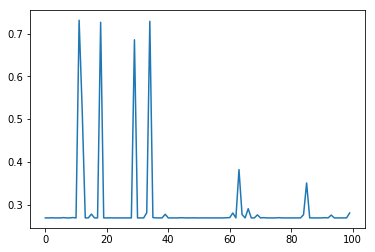

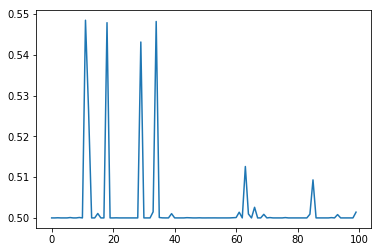

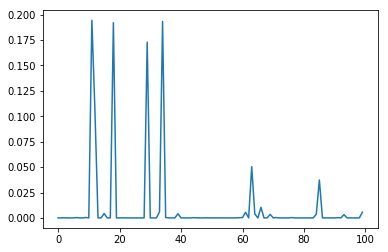

In [0]:
plt.plot(sigmoid_array(aa_n.cpu().numpy()))
plt.figure()
plt.plot(sigmoid_array(aa.cpu().numpy()))
plt.figure()
plt.plot(aa.cpu().numpy())

In [0]:
aa
uu.shape
!ls

data  drive  sample_data


In [0]:
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,11)]       
for t,j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])


ax.legend(fontsize='small')

NameError: ignored

In [0]:
# colorst
['{0:.1f}'.format(2*0.1*i) for i in range(0,11)]          

['0.0', '0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4', '1.6', '1.8', '2.0']

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


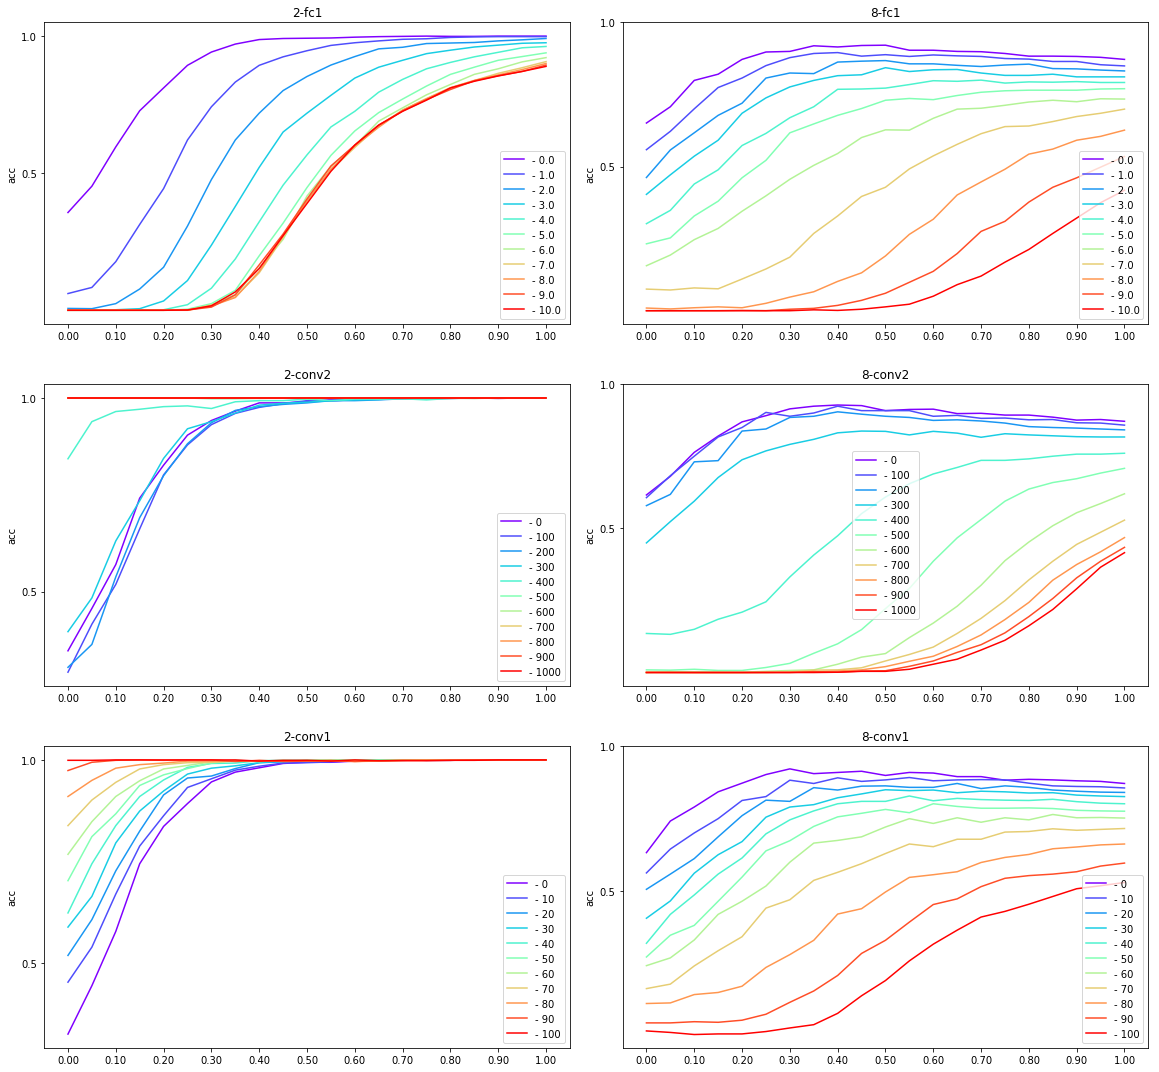

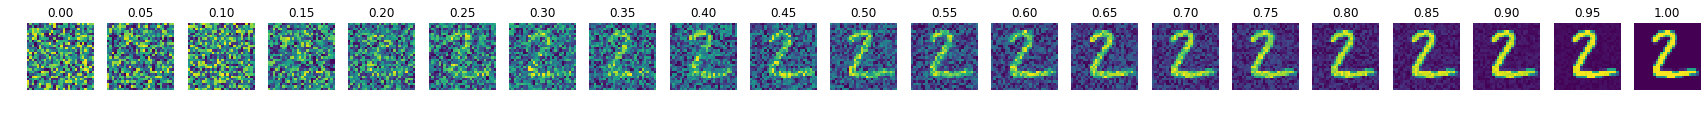

In [0]:
# Microstimulation clean
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

import matplotlib.cm as cm

x = np.arange(11)
ys = [i+x+(i*x)**2 for i in range(11)]

colors = cm.rainbow(np.linspace(0, 1, len(ys)))
# for y, c in zip(ys, colors):
#     plt.scatter(x, y, color=c)

import copy

save_path = 'drive/My Drive/classification_images/microstimulation/'

# - measure response to a noise pattern
# - increase the bias for all neurons proportional to their response in a certain layer
# - see if the classification has been biased toward the class of favor

test_x = test.data.type(torch.FloatTensor).clone() # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
test_y = test.targets.type(torch.ByteTensor).clone() #Variable(test_loader.dataset.test_labels)
# test_x = test_x/256

train_x = train.data.type(torch.FloatTensor).clone() # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
train_y = train.targets.type(torch.ByteTensor).clone() #Variable(test_loader.dataset.test_labels)


f, axarr = plt.subplots(3, 2, )
f.set_figheight(15)
f.set_figwidth(20)


f2, axarr2 = plt.subplots(1, 21, )
f2.set_figheight(5)
f2.set_figwidth(30)

all_size = test_x.size(0)

layers = ['fc1', 'conv2', 'conv1']


dig_names = [str(digit_p), str(digit_q)]

for l_idx, layer in enumerate(layers):

  for which in [1,0]:
    which_data = train_x[train_y == which]/255.    # 1 vs. 7

    with torch.no_grad():

      for k_idx, k in enumerate(range(0,11)):
        fraction_pred_favor = []

        # modulate model
        model2 = Model()
        model2.load_state_dict(copy.deepcopy(model.state_dict()))
        model2.cuda()
        model2.eval()
        y_pred_x, fc1, conv2, conv1 = model2(which_data[:,None,...].cuda()) # amplify zero sensitive ones
        
        if layer == 'conv1':
          avg_activation = torch.mean(conv1, dim=0).mean(-1).mean(-1)
          aa = avg_activation/avg_activation.max()          
          model2.conv1.bias -= k*aa # * model2.fc1.bias  #*avg_activation
          l_legend = [str(k*i) for i in range(0,11)]          
        elif  layer == 'conv2':
          avg_activation = torch.mean(conv2, dim=0).mean(-1).mean(-1)
          aa = avg_activation/avg_activation.max()          
          model2.conv2.bias -= 10*k*aa # * model2.fc1.bias  #*avg_activation
          l_legend = [str(k*10*i) for i in range(0,11)]          
          
        else:
          avg_activation = torch.mean(fc1, dim=0)
          aa = avg_activation/avg_activation.max()
          model2.fc1.bias -= 0.1*k* avg_activation  #*avg_activation
          l_legend = ['{0:.1f}'.format(k*0.1*i) for i in range(0,11)]

        for idx, weight in enumerate(np.linspace(0,1,21)):    
            uu = test_x[test_y==which].clone()/255.
            z = torch.rand(uu.size(0), 28, 28) #.cuda()  
            z.cuda()

    #         stimuli = (1*z + weight*uu)/ (weight+1)
            stimuli = (1-weight)*z + weight*uu

            output, _, _, _ = model(stimuli[:,None,...].cuda())
            pred_n = output.type(torch.ByteTensor).squeeze()

            if k==0:  
              axarr2[idx].imshow(stimuli[0])
              axarr2[idx].axis('off')      
              axarr2[idx].set_title('{:.2f}'.format((weight)))

            output_m, _, _, _ = model2(stimuli[:,None,...].cuda())
            pred_m = output_m.type(torch.ByteTensor).squeeze()

            pp = (pred_n == which).sum().type(torch.FloatTensor) / pred_n.size(0) #       (test_y == which).sum()
            qq = (pred_m == which).sum().type(torch.FloatTensor)  / pred_m.size(0) #       (test_y == which).sum()  
            fraction_pred_favor.append([pp, qq])

        mat = numpy.array(fraction_pred_favor)
#         if k_idx == 0:
#           axarr[which].plot(mat[:,0], 'b')
        axarr[l_idx, which].plot(mat[:,1], color=(colors[k_idx,:3]))
        axarr[l_idx, which].set_yticks([0.5,1])     
#         if which==0:
        axarr[l_idx, which].set_ylabel('acc')
        axarr[l_idx, which].set_title(dig_names[which] + '-' + layer)
  
        axarr[l_idx, which].set_xticks([i for i in range(0,21,2)])       
        axarr[l_idx, which].set_xticklabels(['{:.2f}'.format(i/10) for i in range(0,21)])
        l_legend = ['- ' + q for q in l_legend]
        axarr[l_idx, which].legend(l_legend)                   

f.tight_layout()        
f.subplots_adjust(hspace=0.2, wspace=0.1, right = 0.8)
f.show()

# f.savefig(os.path.join(save_path, str(digit_p)+ str(digit_q)+ layer + '.png'))  
# f2.savefig(os.path.join(save_path, str(digit_p)+ str(digit_q)+ '-.png'))    


In [0]:
# (colors[k_idx,:3]*255).astype(int)
# mat[:,1].shape
# [(colors[k_idx,:3]*255).astype(int)]*21.shape
# np.linspace(0,1,31)
f.tight_layout()        
# f.subplots_adjust(hspace=0.8) #, wspace=0.0, right = 0.8)
f.show()


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


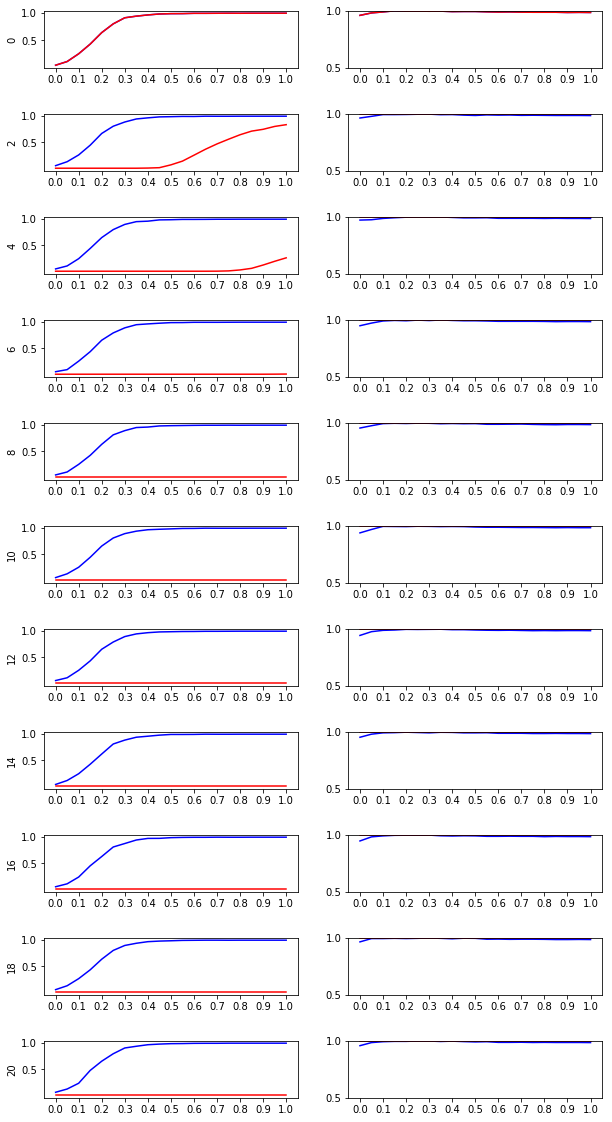

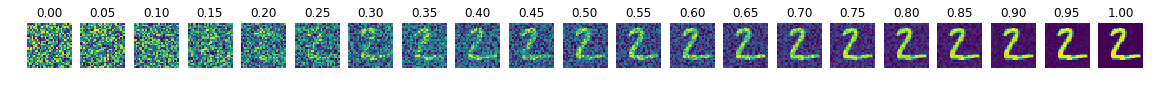

In [0]:
# Microstimulation
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

import copy


save_path = 'drive/My Drive/classification_images/microstimulation/'

# - measure response to a noise pattern
# - increase the bias for all neurons proportional to their response in a certain layer
# - see if the classification has been biased toward the class of favor

test_x = test.data.type(torch.FloatTensor).clone() # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
test_y = test.targets.type(torch.ByteTensor).clone() #Variable(test_loader.dataset.test_labels)
# test_x = test_x/256

train_x = train.data.type(torch.FloatTensor).clone() # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
train_y = train.targets.type(torch.ByteTensor).clone() #Variable(test_loader.dataset.test_labels)




f, axarr = plt.subplots(11, 2, )
f.set_figheight(20)
f.set_figwidth(10)


f2, axarr2 = plt.subplots(1, 21, )
f2.set_figheight(20)
f2.set_figwidth(20)



for which in [0,1]:
  # do the microstimulation first on zero data
  # which = 0
  # classes = {0:1, 1:7}
  which_data = train_x[train_y == which]    # 1 vs. 7

  all_size = test_x.size(0)


  # z = torch.rand(all_size, 28, 28) #.cuda()  
  # z.cuda()
  #plt.imshow(z[1].reshape(28,28))




  # fraction_pred_favor = np.zeros(10, 21, 2)

  with torch.no_grad():


    for k_idx, k in enumerate(range(0,11)):
      fraction_pred_favor = []

      # modulate model
      model2 = Model()
      model2.load_state_dict(copy.deepcopy(model.state_dict()))
      model2.cuda()
      model2.eval()
      y_pred_x, fc1, conv2, conv1 = model2(which_data[:,None,...].cuda()) # amplify zero sensitive ones
      avg_activation = torch.mean(conv1, dim=0).mean(-1).mean(-1)
#       avg_activation = torch.mean(conv1, dim=0)

      aa = avg_activation/avg_activation.max()
      model2.conv1.bias += 40*k*aa # * model2.fc1.bias  #*avg_activation

    
    
    #     model2.fc1.bias += k*100 * avg_activation  #*avg_activation
  #     model2.fc1.bias += 10 #k*2* model2.conv2.bias  #*avg_activation
  #     aa_n = (aa - aa.min()) / (aa.max() - aa.min())
  #     aa_n = 100*aa_n - 100    
  #     model2.fc1.bias += 100*torch.from_numpy(np.exp(aa_n.cpu().numpy())).cuda()



      for idx, weight in enumerate(np.linspace(0,1,21)):    
          uu = test_x[test_y==which].clone()/255
          z = torch.rand(uu.size(0), 28, 28) #.cuda()  
          z.cuda()

  #         stimuli = (1*z + weight*uu)/ (weight+1)
          stimuli = (1-weight)*z + weight*uu


          # acc before modulation on test data
          # y_pred, fc1, _, _ = model2(evaluate_x[:,None,...].cuda())
          # conf, pred = y_pred.data.max(1)
          # pred = pred.type(torch.ByteTensor)
          output, _, _, _ = model(stimuli[:,None,...].cuda())
          # pred = output.data.max(1)[1]
          pred_n = output.type(torch.ByteTensor).squeeze()
        #   test_y = test_y.type(torch.ByteTensor)
  #         cf1 = sklearn.metrics.confusion_matrix(test_y.cpu().numpy(), pred_n.cpu().numpy())
    #       print(cf1)
      #     d = pred_n.eq(test_y.data).cpu()
      #     accuracy = d.sum().type(dtype=torch.float64)/d.size()[0]
      #     print('Accuracy:', accuracy*100)  

    #       plt.figure()

    #       plt.figure()
          if k==0:  
            axarr2[idx].imshow(stimuli[0])
            axarr2[idx].axis('off')      
            axarr2[idx].set_title('{:.2f}'.format((weight)))

    #       axarr[idx, 1].imshow(cf1, cmap = 'gray')
    #       plot_confusion_matrix(test_y.cpu().numpy(), pred_n.cpu().numpy(), classes=[1,7], normalize=True,  title='Normalized confusion matrix')      
    #       axarr[idx, 2].plot() #imshow(ff, cmap = 'gray')
    #       axarr[idx, 1].axis('off')      
    #       axarr[idx, 2].axis('off')      




          # acc after modulation on test data
          output_m, _, _, _ = model2(stimuli[:,None,...].cuda())
          # pred = output.data.max(1)[1]
          pred_m = output_m.type(torch.ByteTensor).squeeze()
        #   test_y = test_y.type(torch.ByteTensor)
  #         cf2 = sklearn.metrics.confusion_matrix(test_y.cpu().numpy(), pred_m.cpu().numpy())
    #       print(cf1.ravel(), cf2.ravel())

    #       plot_confusion_matrix(test_y.cpu().numpy(), pred_m.cpu().numpy(), classes=[1,7], normalize=True,  title='Normalized confusion matrix')      

  #         p, q = (cf1/cf1.sum(axis=1))[which, which], (cf2/cf2.sum(axis=1))[which, which]
  #         p, q, u,v = cf1[:,which].sum()/cf1.sum(), cf2[:,which].sum()/cf2.sum(), cf1[:,other].sum()/cf1.sum(), cf2[:,other].sum()/cf2.sum()
  #         p, q, u, v = (pred_n == which).sum(), (pred_m == which).sum(), (pred_n != which).sum(), (pred_m != which).sum()
  #         p, q, u, v = (pred_n == which).sum(), (pred_m == which).sum(), (pred_n != which).sum(), (pred_m != which).sum()
          pp = (pred_n == which).sum().type(torch.FloatTensor) / pred_n.size(0) #       (test_y == which).sum()
          qq = (pred_m == which).sum().type(torch.FloatTensor)  / pred_m.size(0) #       (test_y == which).sum()  
#           u = v = 0
          a = [pp, qq]
  #         a = map(lambda x:x.type(torch.FloatTensor)/pred_n.size(0), [p, q, u, v])
          fraction_pred_favor.append(a)
  #             (cf[1,1]/ (cf1[1,0] + cf1[1,1]),  cf2[1,1]/ (cf2[1,0] + cf2[1,1]) ) )


        #   d = pred_m.eq(test_y.data).cpu()
        #   accuracy = d.sum().type(dtype=torch.float64)/d.size()[0]
  #         print(cf2)

  #     x,y = zip(*fraction_pred_favor)
      mat = numpy.array(fraction_pred_favor)
      axarr[k_idx, which].plot(mat[:,0], 'b')
      axarr[k_idx, which].plot(mat[:,1], 'r')
  #     axarr[k].plot(mat[:,2], 'b--')
  #     axarr[k].plot(mat[:,3], 'r--') 
      axarr[k_idx, which].set_yticks([0.5,1])     
      if which==0:
        axarr[k_idx, which].set_ylabel(2*k)
      axarr[k_idx, which].set_xticks([i for i in range(0,21,2)])       
      axarr[k_idx, which].set_xticklabels(['{:.1f}'.format(i/10) for i in range(0,21)])
  #     axarr[k_idx].set_xticks(['{0:.2f}'.format(round(k_idx))])           
      f.subplots_adjust(hspace=0.8) #, wspace=0.0, right = 0.8)
      f.show()


f.savefig(os.path.join(save_path, str(digit_p)+ str(digit_q)+'conv1.png'))
f2.savefig(os.path.join(save_path, str(digit_p)+ str(digit_q)+'conv1-.png'))    


In [0]:
!ls

data  sample_data


In [0]:
# nn.sigmoid(10)
k
weight
len(range(0,21))
save_path = 'drive/My Drive/classification_images/microstimulation/'

f.savefig(os.path.join(save_path, str(p)+ str(q)+ str(which)+'.png'))

In [0]:
(test_y==0).sum()

tensor(1135)

In [0]:
avg_activation = torch.mean(conv2, dim=0, dim=2, dim=3)
aa = avg_activation/avg_activation.max()
model2.conv2.bias += 2*k*aa


SyntaxError: ignored

In [0]:
aa.shape
avg_activation.shape
conv2.shape
model2.conv2.bias.shape

torch.Size([50])

In [0]:
np.linspace(0,.3,11)

array([0.  , 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3 ])

In [0]:
# [10,2]/2
# map(lambda x:x/2, [10,2])
numpy.array(fraction_pred_favor)[:,0]
# p.type(torch.FloatTensor)/pred_n.shape[0]
# type(pred_n.shape[0])
(pred_n == which).sum().type(torch.FloatTensor) / (test_y == which).sum()

tensor(1.0423)

In [0]:
linspace(0,.6,13)
len(list(range(0,21,2)))
test_x.shape

torch.Size([2163, 28, 28])

In [0]:
torch.mean(fc1, dim=0).shape
# model.fc1.bias.shape
aa = avg_activation/avg_activation.max()
model.fc1.bias.max()
aa.max()

tensor(1., device='cuda:0')

In [0]:
avg_activation[1:5]
aa[1:5]

tensor([0.0000, 0.0028, 0.0000, 0.0000], device='cuda:0')

In [0]:
model.fc1.bias[1:5] 

tensor([-0.0313,  0.0382, -0.0222,  0.0134], device='cuda:0',
       grad_fn=<SliceBackward>)

In [0]:
model.fc1.bias[1:5] + 10*aa[1:5]

tensor([-0.0313,  0.0660, -0.0222,  0.0134], device='cuda:0',
       grad_fn=<AddBackward0>)

In [0]:
# linspace(0,1,21)
cf1

array([[1135,    0],
       [  48,  980]])

In [0]:
(cf1/cf1.sum(axis=1))#[which, which]

cf1[:,0].sum()/cf1.sum()

0.5469255663430421

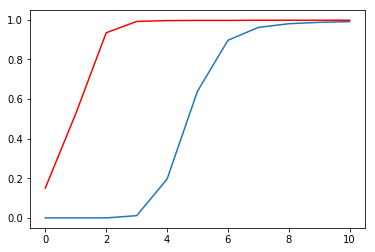

In [0]:
avg_activation.max()
model.fc1.bias.max()

tensor(0.1075, device='cuda:0', grad_fn=<MaxBackward1>)

In [0]:
cf1

# (test_y==0).sum()

array([[1135,   48],
       [   0,  980]])

In [0]:
cf2

array([[1135,   36],
       [   0,  992]])

In [0]:
# plt.imshow(stimuli[2])

# (train_y==4).sum()
test_x.max()
z.max()

tensor(1.0000)

In [0]:
# cf1
# cf1 = sklearn.metrics.confusion_matrix(pred_n.numpy(), test_y.numpy())
# accuracy
np.linspace(0,50,6)
z.shape
cf1

array([[1125,   33],
       [  10,  995]])

In [0]:
print(cf1)

[[1123   30]
 [  12  998]]


In [0]:
cf2

array([[   0,    0],
       [1135, 1028]])

In [0]:
pred.dtype
# test_y.dtype
# pred

test_x.max()

(test_y==1).sum()


tensor(1028)

In [0]:
# test_data.data
y_pred, fc1, conv2, conv1 = model(test_data.data[:,None,...].cuda())

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [0]:
fc1.shape

torch.Size([10000, 100])

In [0]:
model.eval()
torch.no_grad()
print(model.fc1.weight)
y_pred, fc1, conv2, conv1 = model(test_data[:,None,...].cuda())

Parameter containing:
tensor([[ 0.0172,  0.0472,  0.0246,  ...,  0.0029, -0.0122, -0.0214],
        [ 0.0224, -0.0262,  0.0101,  ...,  0.0246, -0.0228,  0.0006],
        [-0.0049,  0.0045,  0.0212,  ...,  0.0316,  0.0056, -0.0578],
        ...,
        [-0.0335, -0.0276,  0.0104,  ..., -0.0406, -0.0106, -0.0441],
        [-0.0020,  0.0058, -0.0085,  ...,  0.0130,  0.0213, -0.0143],
        [ 0.0123, -0.0223,  0.0081,  ..., -0.0299,  0.0204,  0.0125]],
       device='cuda:0', requires_grad=True)


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [0]:
model.fc1.bias.shape
# conv1.shape

y_pred.max()

tensor(1., device='cuda:0', grad_fn=<MaxBackward1>)

In [0]:
avg_activation = torch.mean(fc1, dim=0)
# all_size

model.fc1.bias += 0.1*avg_activation

torch.Size([100])

In [0]:
# embed the signal in noise

# - get a random test digit and add it to random noise
# - feed to the net and collect the answer
# - do record the averages

# Load data

# digit_p, digit_q =  1, 7


test = MNIST('./data', train=False, download=True , transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

data2 = test
# selecting number 0 zero only
tt = data2.targets[(data2.targets== digit_p) | (data2.targets== digit_q)]
tt[tt==digit_p] =  0
tt[tt==digit_q] = 1
dd = data2.data[(data2.targets== digit_p) | (data2.targets== digit_q)] 
# tt = data.targets[(data.targets== 1)]
# dd = data.data[(data.targets== 1)] 

data2.targets = tt
data2.data = dd
test_loader = torch.utils.data.DataLoader(data2, batch_size=100, shuffle=True, drop_last = True)
# Num batches
# num_batches = len(train_loader)
print((tt==0).sum(), (tt==1).sum())

# model.cuda()
model.eval()
test_data = test.data.type(torch.FloatTensor) # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
test_data = test_data/256


#     output = model(evaluate_x[:,None,...])

batch_size = test_data.size(0)
all_size = batch_size * 1

stats = dict()
for i in range(2):
    stats[i] = 0

iters = 1    
    
avgs = torch.zeros(iters, 2, 28*28)


weight = 0.3

for kk in range(iters):
  print(kk)
  
  z = torch.rand(all_size, 28, 28) #.cuda()  
  z.cuda()

  z = (1*z + weight*test_data)/ (weight+1)  # noise + stim
  pred = model(z[:,None,...].cuda())

  for i in range(2):
    stats[i] += torch.sum(pred==i)
  
  for i in range(2):
      a = torch.mean(z[pred.squeeze()==i], dim=0) 
      avgs[kk, i] = a.reshape(28*28)

print(stats)

# plot the avg
dd = torch.mean(avgs, dim=0)
for kk in range(2):
  fig = plt.figure()
  a = dd[kk]
  a = a.view(-1,28)
  plt.imshow(a, cmap = 'gray')

  
  
# plot few samples  
for p in range(2):
#   pred.shape
  # z.shape
  z = torch.rand(all_size, 28, 28)

  # plt.imshow(stimulus[1])
  plt.figure()
  kk = (1*z[p] + weight*test_data[p])/ (weight+1)
#   (test_data[110] + 5*z[p])/5

  # plt.imshow(z[k:k+batch_size][0])
  plt.imshow(kk)
  # batch_size
  # z[k:k+batch_size][0].shape
  # z[k:k+batch_size][0].max()
  print(kk.min(), kk.max())
  print(z[p].min(), z[p].max())
  print(test_data[p].min(), test_data[p].max())

  plt.figure()
  plt.imshow(test_data[p])
  
  plt.figure()
  plt.imshow(z[p])
    

tensor(1135) tensor(1028)
0


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


TypeError: ignored

In [0]:
pred.shape

torch.Size([2163, 1])

tensor(1135) tensor(1028)
0
1
2
3
4


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
{0: tensor(56628, device='cuda:0'), 1: tensor(4876, device='cuda:0'), 2: tensor(2, device='cuda:0'), 3: tensor(37749, device='cuda:0')}


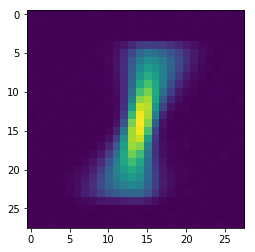

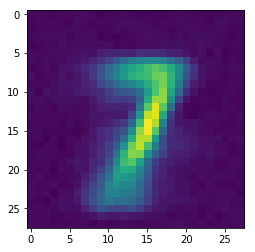

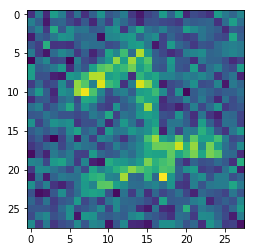

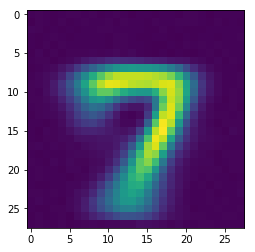

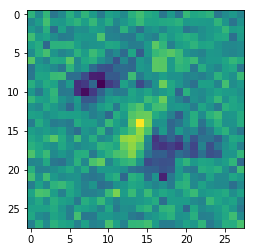

In [0]:
# embed the signal in noise

# - get a random test digit and add it to random noise
# - feed to the net and collect the answer
# - do record the averages

# Load data

# digit_p, digit_q =  1, 7


test = MNIST('./data', train=False, download=True , transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

data2 = test
# selecting number 0 zero only
tt = data2.targets[(data2.targets== digit_p) | (data2.targets== digit_q)]
tt[tt==digit_p] =  0
tt[tt==digit_q] = 1
dd = data2.data[(data2.targets== digit_p) | (data2.targets== digit_q)] 
# tt = data.targets[(data.targets== 1)]
# dd = data.data[(data.targets== 1)] 

data2.targets = tt
data2.data = dd
test_loader = torch.utils.data.DataLoader(data2, batch_size=100, shuffle=True, drop_last = True)
# Num batches
# num_batches = len(train_loader)
print((tt==0).sum(), (tt==1).sum())

# model.cuda()
model.eval()
test_data = test.data.type(torch.FloatTensor) # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
test_data = test_data/256

test_targets = test.targets.cuda()
#     output = model(evaluate_x[:,None,...])



batch_size = test_data.size(0)
all_size = batch_size * 1

stats = dict()
for i in range(4):
    stats[i] = 0

iters = 50
    
# avgs = torch.zeros(iters, 2, 28*28)

p0_0 = [] 
p0_1 = [] 
p1_0 = [] 
p1_1 = [] 


weight = .6

for kk in range(iters):
  print(kk)
  
  z = torch.rand(all_size, 28, 28) #.cuda()  
  z.cuda()

  z = (1*z + weight*test_data)/ (weight+1)  # noise + stim
  pred = model(z[:,None,...].cuda())
  
  pred = pred.squeeze()
  
#   idx = (pred.squeeze()==0) & (test_targets==0)
  
#   z[idx].mean(dim=0)
#   import pdb; pdb.set_trace() 
  idx0 = (pred==0) & (test_targets==0)   # it was 1 predicted 1
  p0_0.append(z[idx0].mean(dim=0))
  
  idx1 = (pred==0) & (test_targets==1)   # it was 7 predicted 1
  p0_1.append(z[idx1].mean(dim=0))

  idx2 = (pred==1) & (test_targets==0)   # it was 1 predicted 7
  sum2 = z[idx2].mean(dim=0)
  if not torch.isnan(sum2).sum():
    p1_0.append(sum2)

  idx3 = (pred==1) & (test_targets==1)   # it was 7 predicted 7
  sum3 = z[idx3].mean(dim=0)
  if not torch.isnan(sum3).sum():  
    p1_1.append(sum3)
  
  
  stats[0] += idx0.sum()
  stats[1] += idx1.sum()
  stats[2] += idx2.sum()
  stats[3] += idx3.sum()

#   for i in range(2):
#     stats[i] += torch.sum(pred==i)
  

#   import pdb; pdb.set_trace()
# for i in range(4):
p0_0 = torch.stack(p0_0)#.squeeze()  
a = torch.mean(p0_0, dim=0)
plt.figure()
plt.imshow(a)

p0_1 = torch.stack(p0_1)#.squeeze()  
b = torch.mean(p0_1, dim=0)
plt.figure()
plt.imshow(b)

p1_0 = torch.stack(p1_0)#.squeeze()  
c = torch.mean(p1_0, dim=0)
plt.figure()
plt.imshow(c)

p1_1 = torch.stack(p1_1)#.squeeze()  
d = torch.mean(p1_1, dim=0)
plt.figure()
plt.imshow(d)



# classification_img = (a+b) - (c+d)
# plt.figure()
# plt.imshow(classification_img)

classification_img = (a+b)  - (c+d)   #  (p0_0 + p1_0) - (p0_1 + p1_1)  (predicted sevens - predicted ones)
plt.figure()
plt.imshow(classification_img)


# classification_img2 = (c+d) - (a+b)   #  (p0_0 + p1_0) - (p0_1 + p1_1)  (predicted sevens - predicted ones)
# plt.figure()
# plt.imshow(classification_img2)



print(stats)

In [0]:
# tSNE

!pip install swat

     |████████████████████████████████| 45.6MB 59.2MB/s 


In [0]:
# import swat
# import seaborn as sns

# # Create CAS Connection
# conn = swat.CAS(host, portnum, protocol='http')
# conn.sessionProp.setSessOpt(messageLevel='NONE'); # Suppress CAS Messages


# # Load CAS Action Sets
# conn.loadactionset('pca')
# conn.loadactionset('tsne');


# # Upload Digits and MNIST Data to CAS Server
# digits_cas = conn.upload_frame(digits, casout=dict(name='digits_df', replace=True))
# mnist_cas = conn.upload_frame(mnist, casout=dict(name='mnist_df', replace=True));

# # Perform PCA: MNIST
# pca_mnist = conn.eig(table='mnist_df',
#                      n=30,
#                      output={'casOut':{'name':'pca_mnist','replace':'TRUE'},
#                              'copyVars':['ID','Label']})

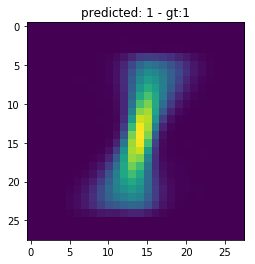

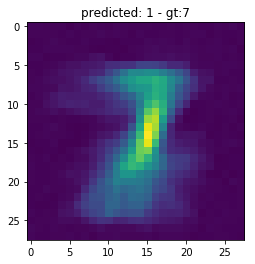

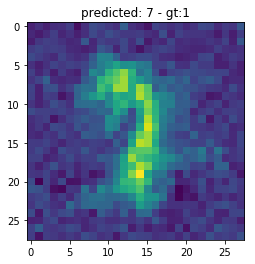

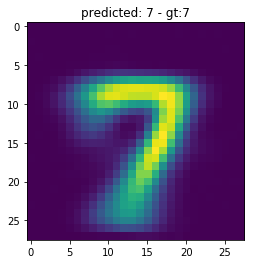

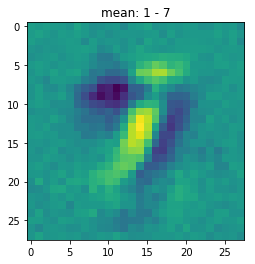

In [0]:
save_path = 'drive/My Drive/classification_images/Binary_case/thresh_0.6'
# plt.title(f'gt: {str(kk)}  -  pred: {str(c.cpu().data[0].numpy())} - conf: {str(conf.cpu().data[0].numpy())} -  size-gt: {stats[kk]}')  
# plt.imshow(a) #, cmap = 'gray')
#fig.savefig(os.path.join(save_path, str(kk)+'-.png'))

# p0_0 = torch.stack(p0_0)#.squeeze()  
a = torch.mean(p0_0, dim=0)
fig = plt.figure()
plt.imshow(a)
plt.title(f'predicted: {1} - gt:{1}')
fig.savefig(os.path.join(save_path, '1-1.png'))

# p0_1 = torch.stack(p0_1)#.squeeze()  
b = torch.mean(p0_1, dim=0)
fig = plt.figure()
plt.imshow(b)
plt.title(f'predicted: {1} - gt:{7}')
fig.savefig(os.path.join(save_path, '1-7.png'))

# p1_0 = torch.stack(p1_0)#.squeeze()  
c = torch.mean(p1_0, dim=0)
fig = plt.figure()
plt.imshow(c)
plt.title(f'predicted: {7} - gt:{1}')
fig.savefig(os.path.join(save_path, '7-1.png'))


# p1_1 = torch.stack(p1_1)#.squeeze()  
d = torch.mean(p1_1, dim=0)
fig = plt.figure()
plt.imshow(d)
plt.title(f'predicted: {7} - gt:{7}')
fig.savefig(os.path.join(save_path, '7-7.png'))


# classification_img = (a+b) - (c+d)
# plt.figure()
# plt.imshow(classification_img)

classification_img = (a+b)  - (c+d)   #  (p0_0 + p1_0) - (p0_1 + p1_1)  (predicted sevens - predicted ones)
fig = plt.figure()
plt.imshow(classification_img)
plt.title(f'mean: {1} - {7}')
fig.savefig(os.path.join(save_path, 'classification_img.png'))



# a.shape
# p0_0.shape
# # z.shape
# stats[0]


# # classification_img = (b+d) - (a+c) 
# classification_img =   (c+d) - (a+b)
# plt.figure()
# plt.imshow(classification_img)


tensor(1135) tensor(1028)
0
1
2
3
4
5
6


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
{0: tensor(202900, device='cuda:0'), 1: tensor(137, device='cuda:0'), 2: 0, 3: 0}


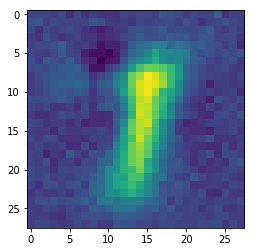

/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


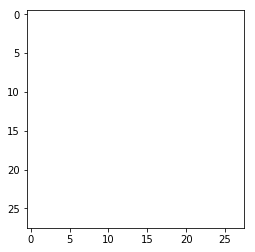

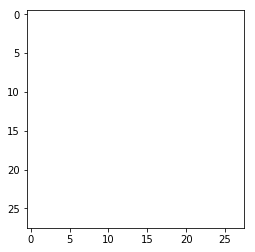

In [0]:
# embed the signal in noise

# - get a random test digit and add it to random noise
# - feed to the net and collect the answer
# - do record the averages

# Load data

# digit_p, digit_q =  1, 7


test = MNIST('./data', train=False, download=True , transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

data2 = test
# selecting number 0 zero only
tt = data2.targets[(data2.targets== digit_p) | (data2.targets== digit_q)]
tt[tt==digit_p] =  0
tt[tt==digit_q] = 1
dd = data2.data[(data2.targets== digit_p) | (data2.targets== digit_q)] 
# tt = data.targets[(data.targets== 1)]
# dd = data.data[(data.targets== 1)] 

data2.targets = tt
data2.data = dd
test_loader = torch.utils.data.DataLoader(data2, batch_size=100, shuffle=True, drop_last = True)
# Num batches
# num_batches = len(train_loader)
print((tt==0).sum(), (tt==1).sum())

# model.cuda()
model.eval()
test_data = test.data.type(torch.FloatTensor) # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
test_data = test_data/256

test_targets = test.targets.cuda()
#     output = model(evaluate_x[:,None,...])



batch_size = test_data.size(0)
all_size = batch_size * 1

stats = dict()
for i in range(4):
    stats[i] = 0

iters = 100
    
# avgs = torch.zeros(iters, 2, 28*28)

p0 = [] 
p1 = [] 


weight = 0.02

for kk in range(iters):
  print(kk)
  
  z = torch.rand(all_size, 28, 28) #.cuda()  
  z.cuda()

  z = (1*z + weight*test_data)/ (weight+1)  # noise + stim
  pred = model(z[:,None,...].cuda())
  
  pred = pred.squeeze()
  
#   idx = (pred.squeeze()==0) & (test_targets==0)
  
#   z[idx].mean(dim=0)
#   import pdb; pdb.set_trace() 
  idx0 = (pred==0)   # predicted 1
  p0.append(z[idx0].mean(dim=0))
  

  idx1 = (pred==1)   # it predicted 7
  p1.append(z[idx1].mean(dim=0))

  
  stats[0] += idx0.sum()
  stats[1] += idx1.sum()
#   for i in range(2):
#     stats[i] += torch.sum(pred==i)
  

#   import pdb; pdb.set_trace()
# for i in range(4):
p0 = torch.stack(p0)#.squeeze()  
a = torch.mean(p0, dim=0)
plt.figure()
plt.imshow(a)

p1 = torch.stack(p1)#.squeeze()  
b = torch.mean(p1, dim=0)
plt.figure()
plt.imshow(b)



# classification_img = (a+b) - (c+d)
# plt.figure()
# plt.imshow(classification_img)

classification_img = (b) - (a)   #   (predicted sevens - predicted ones)
plt.figure()
plt.imshow(classification_img)

print(stats)

In [0]:
# y_pred.max()
# z[k:k+batch_size][0].max()
y_pred.max()
pred.max()

test.targets.max()
y_pred = model(stimulus.cuda())

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


ValueError: ignored

In [0]:
# y_pred[y_pred <= 0.5]= 0
y_pred.max()
# stimulus[0].max()

tensor(1., device='cuda:0', grad_fn=<MaxBackward1>)

In [0]:
stats

{0: tensor(54759), 1: tensor(377841)}

tensor(0.9565)

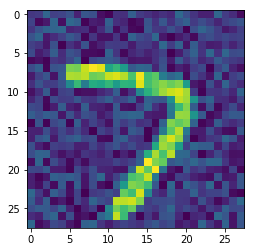

In [0]:
plt.imshow(stimulus[4])
stimulus[0].max()
# stimulus

In [0]:
avgs.shape
weight


0.05

tensor(8.2135e-05) tensor(0.9993)
tensor(8.2135e-05) tensor(0.9993)
tensor(0.) tensor(0.9961)
tensor(0.0032) tensor(1.0000)
tensor(0.0032) tensor(1.0000)
tensor(0.) tensor(0.9961)


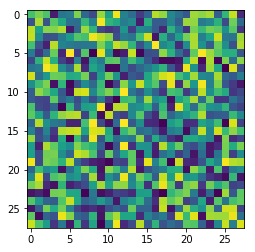

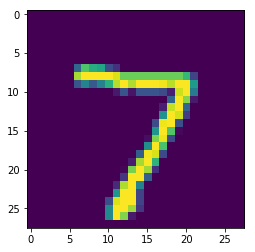

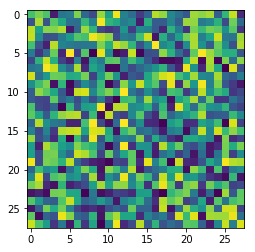

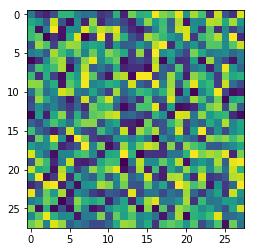

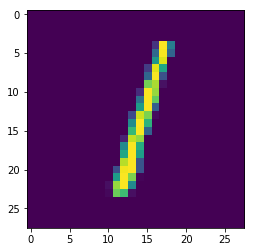

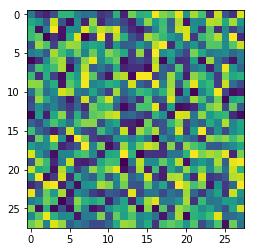

In [0]:
# stats
weight = 0

for p in range(2):
#   pred.shape
  # z.shape
  z = torch.rand(all_size, 28, 28)

  # plt.imshow(stimulus[1])
  plt.figure()
  kk = (1*z[p] + weight*test_data[p])/ (weight+1)
#   (test_data[110] + 5*z[p])/5

  # plt.imshow(z[k:k+batch_size][0])
  plt.imshow(kk)
  # batch_size
  # z[k:k+batch_size][0].shape
  # z[k:k+batch_size][0].max()
  print(kk.min(), kk.max())
  print(z[p].min(), z[p].max())
  print(test_data[p].min(), test_data[p].max())

  plt.figure()
  plt.imshow(test_data[p])
  
  plt.figure()
  plt.imshow(z[p])
  

In [0]:
# a.sum()
test_data = test.data.type(torch.FloatTensor) # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
test_data.shape

torch.Size([2167, 28, 28])

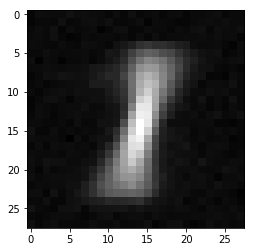

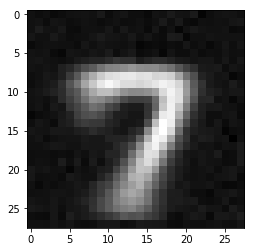

In [0]:
# plot the avg
dd = torch.mean(avgs, dim=0)
#dd = dd - grand_mean
for kk in range(2):
  
  fig = plt.figure()
  a = dd[kk]
  a = a.view(-1,28)
#   b = model(a[None,None,...].cuda())

  #a = torch.nn.functional.log_softmax(a)# torch.nn.functional.softmax(a)
#   c = b.data.max(1)[1]
#   plt.title(f'gt: {str(kk)}  -  pred: {str(c.cpu().data[0].numpy())} -  size-gt: {stats[kk]}')  
  plt.imshow(a, cmap = 'gray')
#   fig.savefig(os.path.join(save_path, str(kk)+'-mlp.png'))

**End of the signal in NOISE analysis**

In [0]:
EPOCHS = 30
losses = []

model.train()
for epoch in range(EPOCHS):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Get Samples
        data, target = Variable(data), Variable(target)
        
        if cuda:
            data, target = data.cuda(), target.cuda()
        
        # Init
        optimizer.zero_grad()

        # Predict
        y_pred = model(data) 

        # Calculate loss
        loss = F.cross_entropy(y_pred, target)
        losses.append(loss.cpu().data)
#         losses.append(loss.cpu().data[0])        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        
        # Display
        if batch_idx % 100 == 1:
            print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch+1,
                EPOCHS,
                batch_idx * len(data), 
                len(train_loader.dataset),
                100. * batch_idx / len(train_loader), 
                loss.cpu().data), 
                end='')
    # Eval
    evaluate_x = Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
    evaluate_y = Variable(test_loader.dataset.test_labels)
    if cuda:
        evaluate_x, evaluate_y = evaluate_x.cuda(), evaluate_y.cuda()

    model.eval()
    output = model(evaluate_x[:,None,...])
    pred = output.data.max(1)[1]
    d = pred.eq(evaluate_y.data).cpu()
    accuracy = d.sum().type(dtype=torch.float64)/d.size()[0]
    
    print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Test Accuracy: {:.4f}%'.format(
        epoch+1,
        EPOCHS,
        len(train_loader.dataset), 
        len(train_loader.dataset),
        100. * batch_idx / len(train_loader), 
        loss.cpu().data,
        accuracy*100,
        end=''))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


 Train Epoch: 1/30 [256/60000 (0%)]	Loss: 2.279951

Exception in thread Thread-8:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/_utils/pin_memory.py", line 21, in _pin_memory_loop
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.6/dist-packages/torch/multiprocessing/reductions.py", line 276, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 87, in get_connection
    c = Client(address, authkey=process.current_process().authkey)
  File "/usr/lib/python

KeyboardInterrupt: ignored

In [0]:
save_path = 'drive/My Drive/classification_images'
torch.save(model,os.path.join(save_path, 'mlp.pth'))
torch.save(model.state_dict(), os.path.join(save_path, 'mlp_state.pth'))

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [0]:
save_path

'drive/My Drive/classification_images'

In [0]:
evaluate_x = Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
evaluate_y = Variable(test_loader.dataset.test_labels)
if cuda:
    evaluate_x, evaluate_y = evaluate_x.cuda(), evaluate_y.cuda()

model.eval()
output = model(evaluate_x[:,None,...])
pred = output.data.max(1)[1]
d = pred.eq(evaluate_y.data).cpu()
accuracy = d.sum().type(dtype=torch.float64)/d.size()[0]

print('Accuracy:', accuracy*100)

Accuracy: tensor(98.3000, dtype=torch.float64)


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


In [0]:
import sklearn
from sklearn import metrics
sklearn.metrics.confusion_matrix(pred.cpu().numpy(), evaluate_y.cpu().numpy())


array([[ 971,    0,    1,    0,    0,    1,    2,    1,    1,    2],
       [   1, 1125,    0,    0,    1,    0,    2,    3,    0,    2],
       [   0,    3, 1014,    3,    3,    0,    1,    7,    3,    1],
       [   1,    1,    1,  994,    1,    2,    1,    2,    4,    3],
       [   0,    0,    1,    0,  959,    0,    1,    0,    1,    5],
       [   1,    1,    0,    4,    1,  874,    6,    0,    0,    2],
       [   2,    2,    2,    0,    4,    2,  940,    0,    1,    1],
       [   1,    1,    6,    2,    3,    2,    0, 1006,    3,    2],
       [   2,    2,    6,    3,    2,    9,    5,    5,  961,    5],
       [   1,    0,    1,    4,    8,    2,    0,    4,    0,  986]])

In [0]:
batch_size = 10000
all_size = 100000

stats = dict()
for i in range(10):
    stats[i] = 0
  
    
avgs = torch.zeros(100, 10, 28*28)

for kk in range(100):
  print(kk)
  
#   z = torch.rand(all_size, 1, 28, 28)*2 -1 #.cuda()
  z = torch.rand(all_size, 1, 28, 28) #.cuda()
  
  z.cuda()
  #plt.imshow(z[1].reshape(28,28))


  all_preds = []
  all_idx = torch.ones(all_size, dtype = torch.uint8)
  for k in range(0,all_size, batch_size):
      y_pred = model(z[k:k+batch_size].cuda())
      y_pred[y_pred <= 0]= 0

      indices = torch.ones(y_pred.size(0), dtype = torch.uint8)
      indices[torch.mean(y_pred, dim =1)==0] = 0 

      all_idx[k:k+batch_size] = indices 
      pred = y_pred[indices==1].data.max(1)[1]

      all_preds.append(pred)

  pred = torch.cat(all_preds)

  for i in range(10):
    stats[i] += torch.sum(pred==i)
  
  z = z[all_idx]
  for i in range(10):
      a = torch.mean(z[pred==i] , dim=0) 
      avgs[kk, i] = a.reshape(28*28)


0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [0]:
z = torch.rand(1000000, 784)
grand_mean = torch.mean(z,dim=0)

In [0]:
(indices==1).sum()
y_pred.size(0)
y_pred[1]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0',
       grad_fn=<SelectBackward>)

In [0]:
stats

{0: tensor(27958, device='cuda:0'),
 1: tensor(0, device='cuda:0'),
 2: tensor(5183612, device='cuda:0'),
 3: tensor(2409211, device='cuda:0'),
 4: tensor(0, device='cuda:0'),
 5: tensor(2240440, device='cuda:0'),
 6: tensor(51097, device='cuda:0'),
 7: tensor(81470, device='cuda:0'),
 8: tensor(6207, device='cuda:0'),
 9: tensor(5, device='cuda:0')}

In [0]:
grand_mean.shape

torch.Size([784])

In [0]:
b.data.max(1)[1]
b
a.shape

torch.Size([28, 28])

In [0]:
for i in range(10):
    print(torch.sum(pred==i))  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_sca

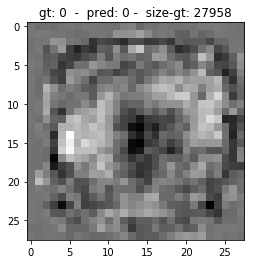

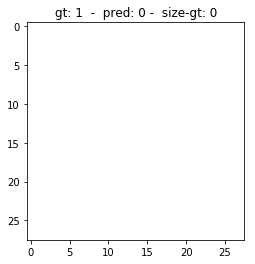

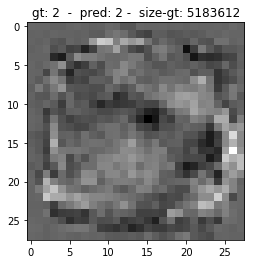

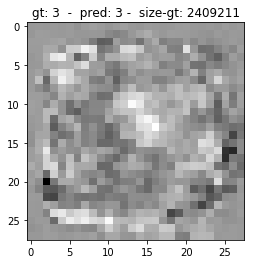

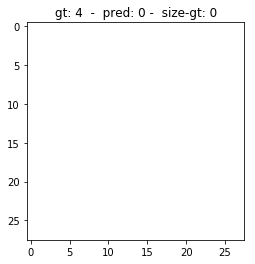

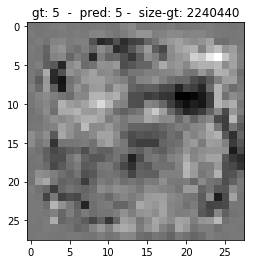

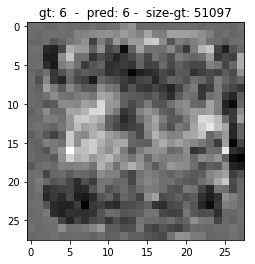

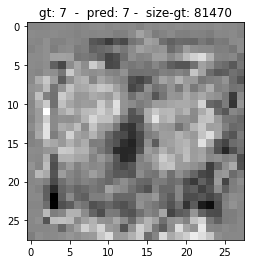

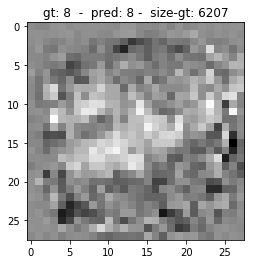

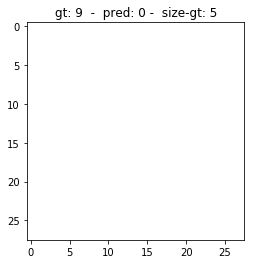

In [0]:
dd = torch.mean(avgs, dim=0)
#dd = dd - grand_mean
for kk in range(10):
  
  fig = plt.figure()
  a = dd[kk]
  a = a.view(-1,28)
  b = model(a[None,None,...].cuda())

  #a = torch.nn.functional.log_softmax(a)# torch.nn.functional.softmax(a)
  c = b.data.max(1)[1]
  plt.title(f'gt: {str(kk)}  -  pred: {str(c.cpu().data[0].numpy())} -  size-gt: {stats[kk]}')  
  plt.imshow(a, cmap = 'gray')
  fig.savefig(os.path.join(save_path, str(kk)+'-mlp.png'))
  

In [0]:
for i in range(10):
    print(torch.sum(pred==i))

tensor(236, device='cuda:0')
tensor(3, device='cuda:0')
tensor(1874, device='cuda:0')
tensor(160, device='cuda:0')
tensor(2689, device='cuda:0')
tensor(22, device='cuda:0')
tensor(44, device='cuda:0')
tensor(81, device='cuda:0')
tensor(93796, device='cuda:0')
tensor(98, device='cuda:0')


In [0]:
# ls
from google.colab import files
files.download('./*.png')


FileNotFoundError: ignored

In [0]:
ls drive/My\ Drive/classification_images


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


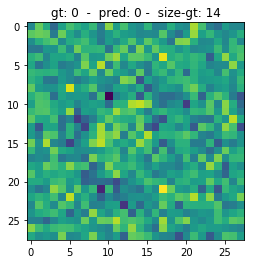

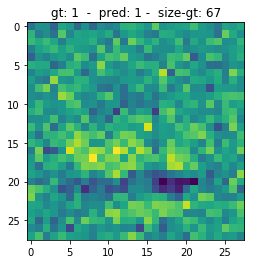

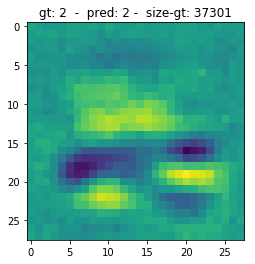

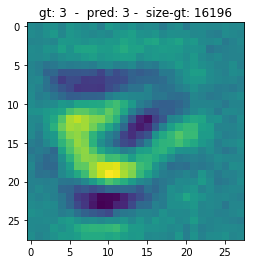

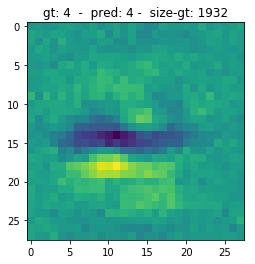

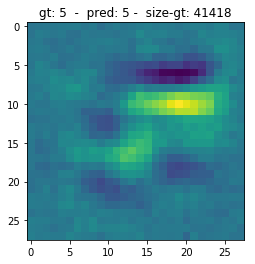

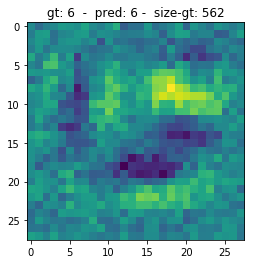

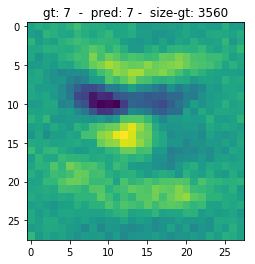

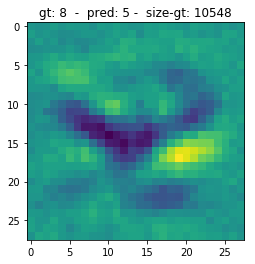

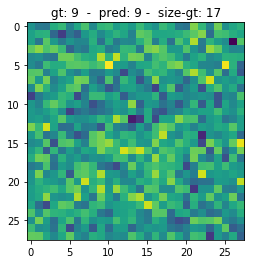

In [0]:
# z = z[all_idx]
pred = torch.cat(all_preds)
for i in range(10):
    plt.figure()
    a = torch.mean(z[pred==i] , dim=0) 
    a = a.view(-1,28)
    b = model(a[None,None,...].cuda())
    c = b.data.max(1)[1]
    plt.title(f'gt: {str(i)}  -  pred: {str(c.cpu().data[0].numpy())} -  size-gt: {z[pred==i].size(0)}')
    plt.imshow(1-a)

In [0]:
for i in range(z.size(0)):
  print(torch.max(data[1,0]))

tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='c

KeyboardInterrupt: ignored